# The objective of this study is to carry out an exploratory analysis and supplement the database by predecting the nutritional grade of the data

### Steps in Data Preprocessing : 
- Here are the steps I have followed: 
- 1) Import libraries
- 2) Read Data
- 3) Cheking for missing values 
- 4) Cheking for categorical data
- 5) Standardize the data 
- 6) PCA transformation 
- 7) Data splitting



In [1]:
# main libraries
import pandas as pd
import numpy as np
#import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn import preprocessing , decomposition , neighbors
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#scipy libraries
from scipy import stats
from scipy.stats import chi2_contingency


from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import random
import warnings
warnings.filterwarnings('ignore')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [2]:
# Loading the data 
data= pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.486047e+06,1.486047e+06,0.0,0.0,4.444010e+05,0.0,649063.000000,0.0,649063.000000,0.0,...,10760.000000,591486.000000,28.000000,3.000000,0.0,38.000000,1712.000000,24.000000,44.000000,20.000000
mean,1.540097e+09,1.574462e+09,NaN,NaN,2.500244e+16,NaN,2.029632,NaN,0.020771,NaN,...,630.266404,9.159471,7.928571,29.333333,NaN,0.068208,0.068920,3.719583,0.025891,0.038885
std,4.643452e+07,2.636310e+07,NaN,NaN,1.666748e+19,NaN,2.880744,NaN,0.144433,NaN,...,6383.880040,8.914490,9.059182,15.011107,NaN,0.036215,1.826776,1.530099,0.026873,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,0.049000,-15.000000,-6.000000,14.000000,NaN,0.008000,0.000000,0.400000,0.001350,0.004000
25%,1.510213e+09,1.564844e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,111.000000,1.000000,0.000000,22.000000,NaN,0.053000,0.000008,3.325000,0.009225,0.007000
50%,1.549126e+09,1.583787e+09,NaN,NaN,5.000000e+01,NaN,1.000000,NaN,0.000000,NaN,...,329.360000,10.000000,5.500000,30.000000,NaN,0.069000,0.000023,3.950000,0.021000,0.008500
75%,1.579546e+09,1.587846e+09,NaN,NaN,1.130000e+02,NaN,3.000000,NaN,0.000000,NaN,...,614.200000,16.000000,17.000000,37.000000,NaN,0.089000,0.000095,4.450000,0.027700,0.011250
max,1.602553e+09,1.602553e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,3.000000,NaN,...,656298.600000,40.000000,25.000000,44.000000,NaN,0.150000,54.000000,7.300000,0.150000,0.572000


In [4]:
#le type de chaque colonnes 
data.dtypes

code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 182, dtype: object

## Preprocessing

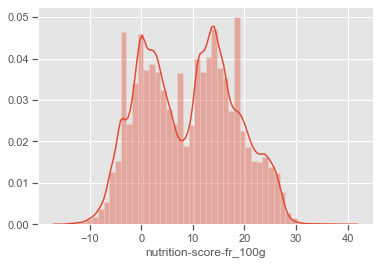

In [26]:
# afficher la distribution graphique d'une variable quantitative
#histogram 
sns.distplot(data['nutrition-score-fr_100g'])
plt.show()

In [27]:
#skewness: c'est un coefficient d'asymétrie correspant à une mesure de l'asymetrie de la distribution d'une variable aléatoire réelle 
# puisque skewness=0.08 donc la distribution est symétrique
# kurtosis= coefficient d'aplatissement 
print("Skewness: %f"% data['nutrition-score-fr_100g'].skew())
print("Kurtosis: %f"% data['nutrition-score-fr_100g'].kurt())

Skewness: 0.083776
Kurtosis: -0.953481


In [2]:
# Variable qualitative
def pie_plot(feature, data=data):
    f, ax=plt.subplots(figsize=(15, 10))
    labels = []
    sizes = list(data[feature].value_counts().sort_index())
    explode = [0] * len(sizes)
    explode[sizes.index(max(sizes))] = 0.1
    if feature == 'nutriscore_grade':
        cs = ["green", "lime", "yellow", "orange", "red"]
        labels = ["a", "b", "c", "d", "e"]

    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=cs)
    ax.axis('equal')
    ax.set_xlabel(feature)   
    plt.show()
    
pie_plot('nutriscore_grade', data=data)    
  

NameError: name 'data' is not defined

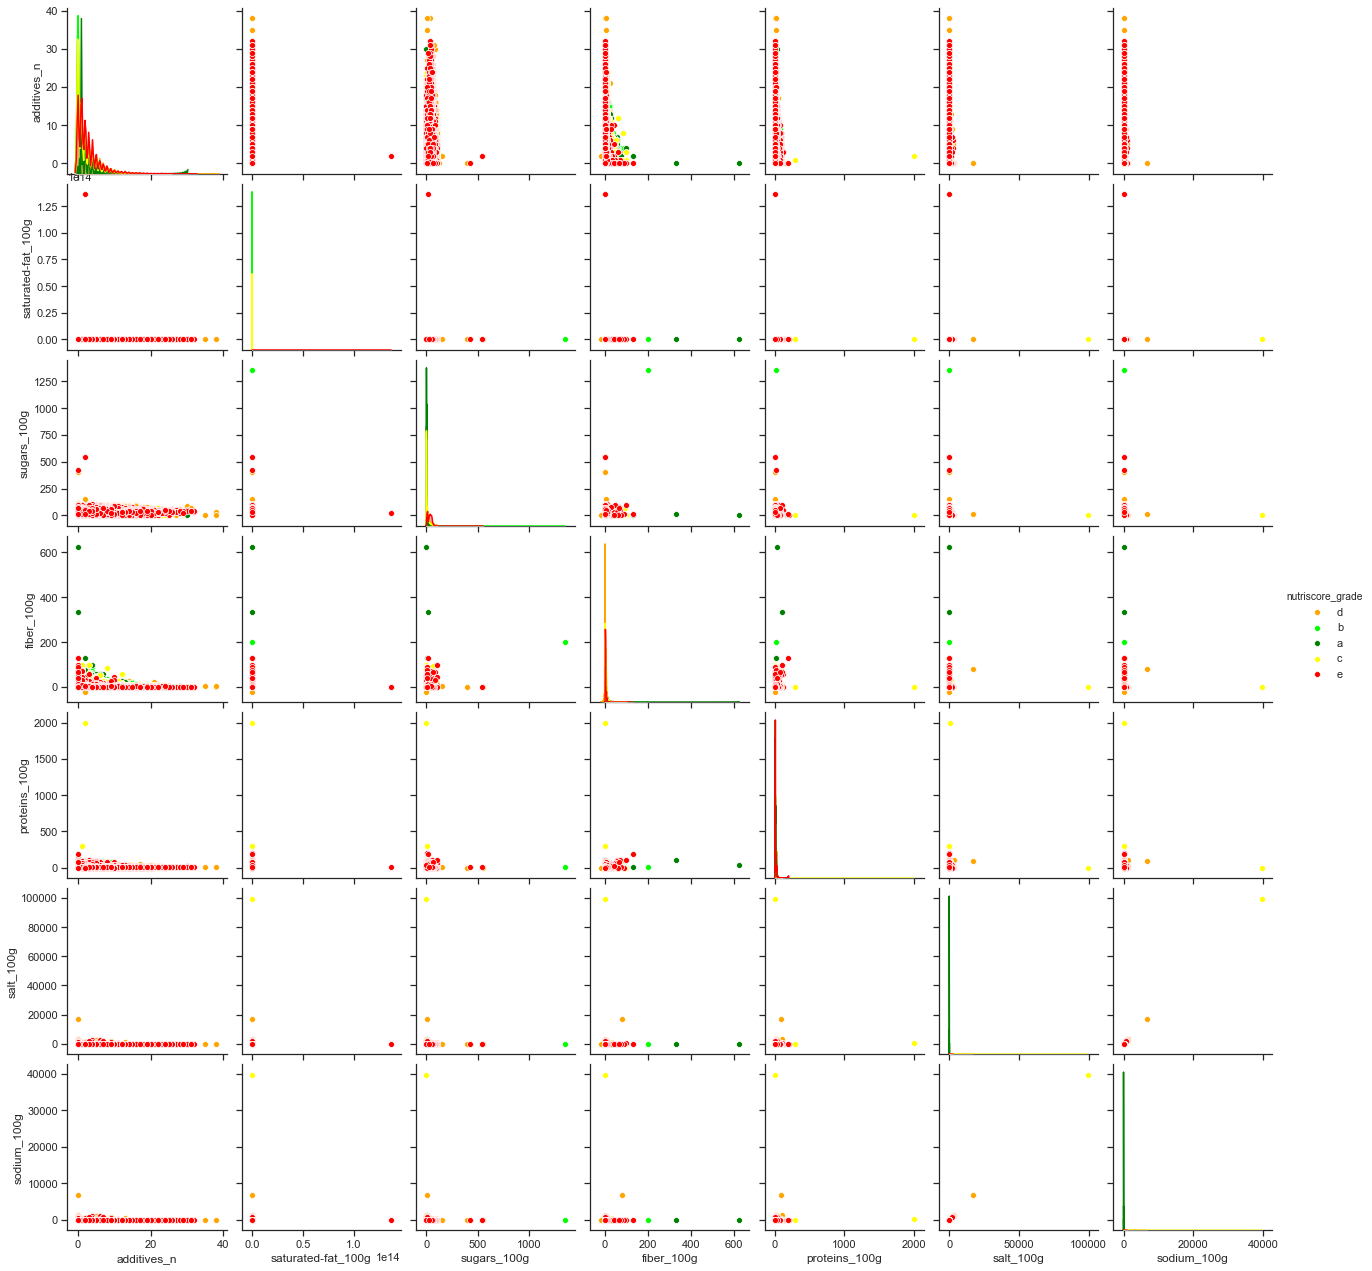

In [29]:
# Corrélation linéaire variables quantitatives
sns.set(style="ticks", color_codes=True)
features=[ 'additives_n','saturated-fat_100g','sugars_100g',
          'fiber_100g', 'proteins_100g', 'salt_100g','sodium_100g']
def pai_plot(features, data=data):
    g= sns.pairplot(data, vars=features,  hue='nutriscore_grade', palette={"a":"green", "b":"lime", "c":"yellow",
                                                                                      "d":"orange", "e":"red"})
pai_plot(features, data=data)       

### Intreprétation du pair plot :
- Plus une reprisentation tend vers une droite, plus les deux variables composants le graphique sont des doublons pour nos analyses: 
- Pour cela nous pouvons supprimer les indicateurs suivants: salts et sodium
- Ce pairplot nous permet aussi d'analyser quel indicateur est correlé au grade nutritionnel, grace à la couleur représenatant chaque lettre de l'echelle.

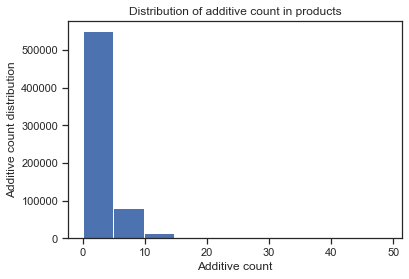

In [30]:
plt.title("Distribution of additive count in products")
plt.xlabel("Additive count")
plt.ylabel("Additive count distribution")
plt.hist(data["additives_n"])
plt.show()

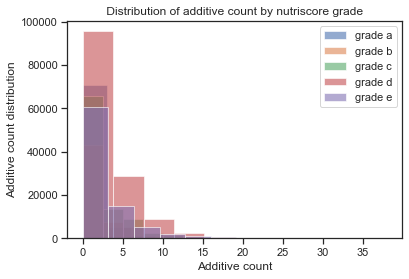

In [31]:
add_by_grade= data["additives_n"].groupby(data["nutriscore_grade"])
# histograme of the distributions 
for additive, grade in add_by_grade:
    plt.hist(grade, label="grade {}".format(additive), alpha=0.6)
    plt.xlabel("Additive count")
    plt.ylabel("Additive count distribution")
    plt.title(" Distribution of additive count by nutriscore grade ")
plt.legend()
plt.show()

- the predominant grade here is grade 3 = grade D which means a lot of products have a grade that is below average !!!

# 'nutrition-score-fr_100g', her buddies and her interests
### Relationship with numerical variables

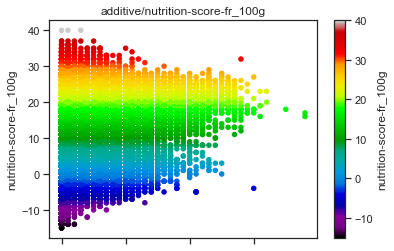

In [32]:
#scatter plot additives_n/nutrition-score-fr_100g

var='additives_n'
df= pd.concat([data['nutrition-score-fr_100g'], data['additives_n']], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g',title='additive/nutrition-score-fr_100g', c=0, cmap = "nipy_spectral")
plt.xlabel('additives_n')
plt.ylabel('nutrition-score-fr_100g')
plt.show()


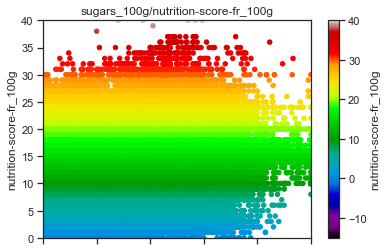

In [33]:
#scatter plot 'sugars_100g'/nutrition-score-fr_100g
var='sugars_100g'
df= pd.concat([data['nutrition-score-fr_100g'], data['sugars_100g']], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g',ylim=(0,40), xlim=(0,100),title='sugars_100g/nutrition-score-fr_100g', c=0, cmap = "nipy_spectral")
plt.show()

### Relationship with categorical features 

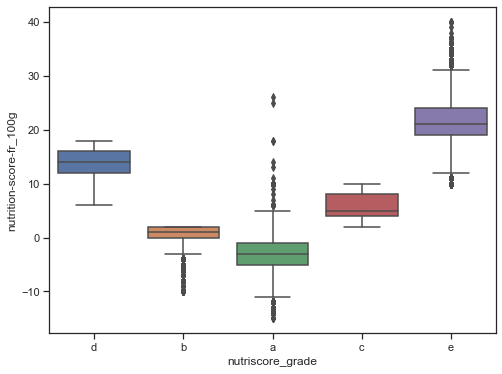

In [34]:
#box plot nutrition_grade_fr/nutrition-score-fr_100g
var= 'nutriscore_grade'
df= pd.concat([data['nutrition-score-fr_100g'],data[var]], axis=1)
f,ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y="nutrition-score-fr_100g", data=df)
#fig.axis=(ymin=0, ymax=50)

In [137]:
# create a new data frame to filter the 'nutrition-score-fr_100g'
l=['a', 'b']
sub_data=data.loc[ (data.nutriscore_grade.isin(l)) & (data['nutrition-score-fr_100g']<5)]
sub_data.to_csv('filtered.csv')

# Analysez une variable quantitative et une variable qualitative par ANOVA " Analysis of Variable"
- La méthode ANOVA est une analyse de la covariance entre deux variables (quantitative et qualitative)
- Notre variable qualitative sera le nutriscore_grade (de a à e)
- l'analyse sera pour chaque indicateurs


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# ANOVA with one categorical feature
data_one_categorical=ols('sugars_100g~ C(nutriscore_grade)', data=data).fit() # specify C for categorical
sm.stats.anova_lm(data_one_categorical, typ=2)

,sum_sq,df,F,PR(>F)
C(nutriscore_grade),3.236574e+07,4.0,27300.146077,0.0
Residual,1.748301e+08,589869.0,NaN,NaN


- The probability of the F statistic is statistically significant (PR(>F)<0.05) meaning the information in nutriscore grade has predictive power for 'sugars_100'

# ANOVA with categorical and numerical features :

In [37]:
data_lm= ols( 'additives_n ~ C(nutriscore_grade) +  sugars_100g + fiber_100g+ proteins_100g + salt_100g + sodium_100g', data=data).fit()
sm.stats.anova_lm(data_lm, typ=2)

,sum_sq,df,F,PR(>F)
C(nutriscore_grade),1.448988e+05,4.0,4093.759894,0.000000
sugars_100g,2.276807e+04,1.0,2573.023442,0.000000
fiber_100g,1.880126e+04,1.0,2124.733614,0.000000
proteins_100g,1.583269e+04,1.0,1789.254827,0.000000
salt_100g,8.657523e+00,1.0,0.978388,0.322598
sodium_100g,8.621862e+00,1.0,0.974358,0.323596
Residual,3.040346e+06,343590.0,NaN,NaN


In [38]:
data_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            additives_n   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4591.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:38   Log-Likelihood:            -8.6211e+05
No. Observations:              343600   AIC:                         1.724e+06
Df Residuals:                  343590   BIC:                         1.724e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.1590      0.013     89.055      0.000       1.133       1.184
C(nutriscore_grade)[T.b]     0.8263      0.018     45.211      0.000       0.790       0.862
C(nutriscore_grade)[T.c]     1.1164      0.016     69.214      0.000       1.085       1.148
C(nutriscore_grade)[T.d]     1.8701      0.016    117.978      0.000       1.839       1.901
C(nutriscore_grade)[T.e]     2.0157      0.019    106.768      0.000       1.979       2.053
sugars_100g                  0.0164      0.000     50.725      0.000       0.016       0.017
fiber_100g                  -0.0540      0.001    -46.095      0.000      -0.056      -0.052
proteins_100g               -0.0260      0.001    -42.300      0.000      -0.027      -0.025
salt_100g                    0.0233      0.024      0.989      0.323      -0.023       0.069
sodium_100g                 -0.0581      0.059     -0.987      0.324      -0.174       0.057
==============================================================================
Omnibus:                   168853.953   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1238889.415
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      11.125   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

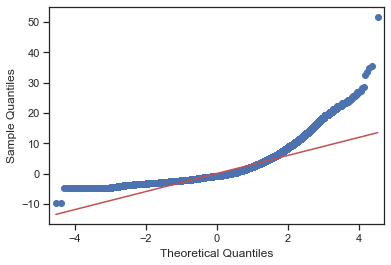

In [39]:
# Check the normal distribution of residuals
res= data_lm.resid
fig=sm.qqplot(res, line='s')
plt.show()

- From the above Q-Q plot, we can see that residuals are almost normally distributed (although points at the extreme ends can be discounted). Hence, we can conclude that it satisfies the Normality assumption of the ANOVA test.

In [ ]:
# la calcul de eta_squared 
X = data['nutriscore_grade'] # qualitative
Y =data['trans-fat_100g'] # quantitative

#sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    print(classes)
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(X,Y) 

# Analyez 2 variables qualitatives avec le CHi-2: 

# Cleaning : First, there are many missing values in the dataset. 

In [5]:
print("the numbre of rows: ",data.shape[0], "numbre of columns: ", data.shape[1] )

the numbre of rows:  1486047 numbre of columns:  182


Text(0.5, 0, 'percentage')

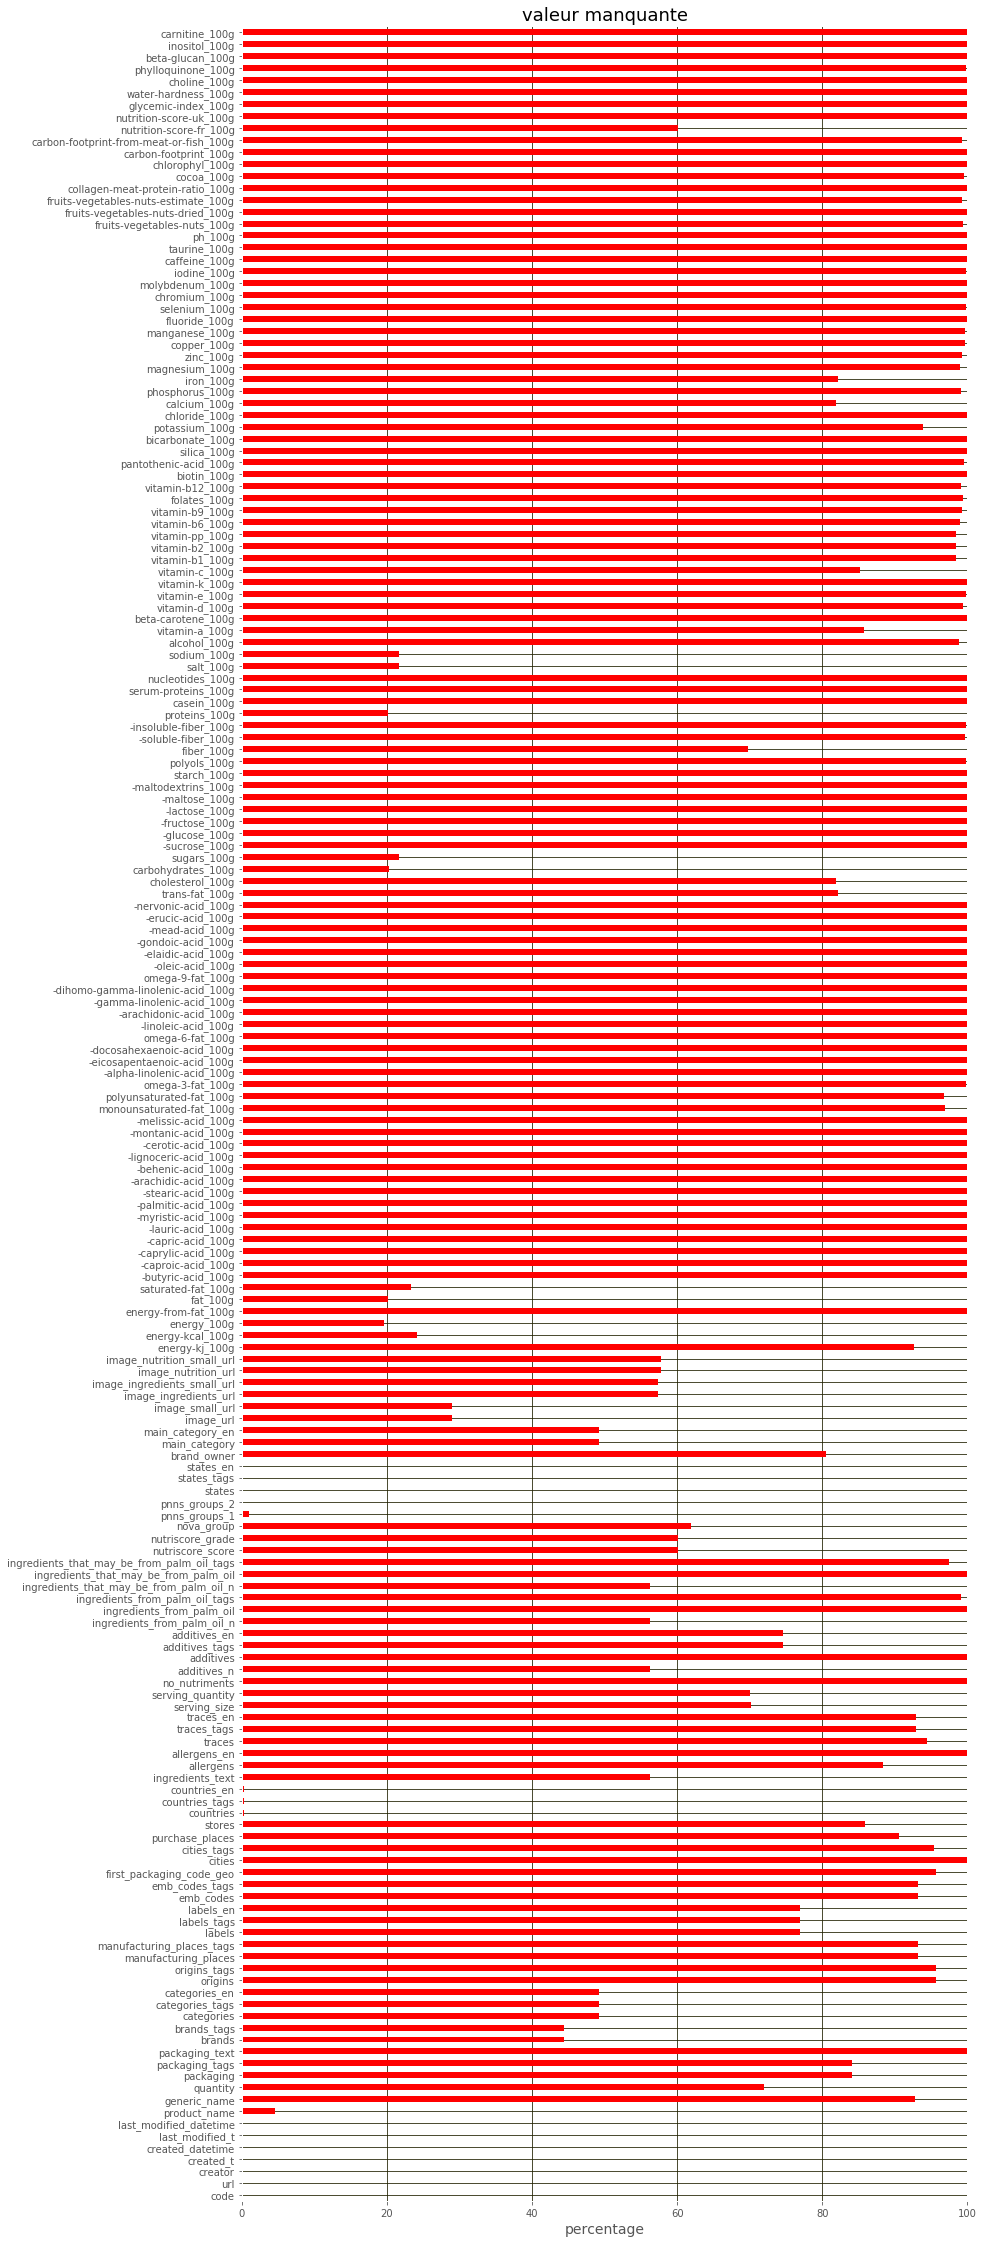

In [6]:
plt.figure(figsize=(13, 40))
plt.rcParams['axes.facecolor']='white'
plt.rc('grid', color='#202000')
(data.isnull().mean(axis=0)*100).plot.barh(color='#FF0000')
plt.xlim(xmax=100)
plt.title('valeur manquante', fontsize=18)
plt.xlabel("percentage", fontsize=14)

In [7]:
# dropping the rows having NaN values  in 'nutrition-score-fr_100g'
data=data.dropna(subset=['nutrition-score-fr_100g', 'nutriscore_grade' ]) 
print("number of rows after dropping the nan values in nutrition-score-fr_100g and nutriscore_grade: ",data.shape[0])

number of rows after dropping the nan values in nutrition-score-fr_100g and nutriscore_grade:  591486


- There is a lo of variable anconsistent, i decided to remove features with 80% of missing values  

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
-melissic-acid_100g,591486,1.000000
-caproic-acid_100g,591486,1.000000
-nervonic-acid_100g,591486,1.000000
-erucic-acid_100g,591486,1.000000
-mead-acid_100g,591486,1.000000
-gondoic-acid_100g,591486,1.000000
-elaidic-acid_100g,591486,1.000000
-lignoceric-acid_100g,591486,1.000000
-stearic-acid_100g,591486,1.000000
-myristic-acid_100g,591486,1.000000


In [9]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Percent'] > 0.80]).index,1)
data.isnull().sum().max() #just checking that there's no missing data missing...
data.shape

(591486, 66)

Text(0.5, 0, 'percentage')

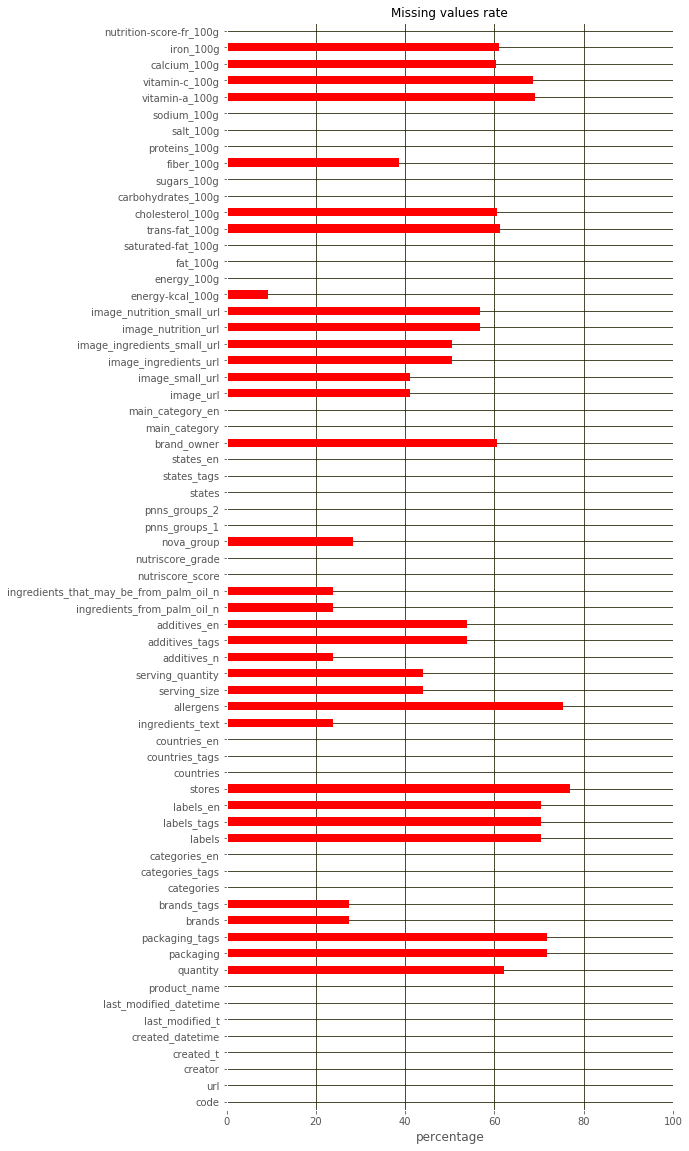

In [10]:
plt.figure(figsize=(8, 20))
plt.rcParams['axes.facecolor']='white'
plt.rc('grid', color='#202000')
(data.isnull().mean(axis=0)*100).plot.barh(color='#FF0000')
plt.xlim(xmax=100)
plt.title('Missing values rate', fontsize=12)
plt.xlabel("percentage", fontsize=12)

- After removing all the rows with 'nutrition-score-fr_100g'== NaN and removing all the columns with 80% of NaN i got data with shape of (591486, 66)

In [11]:
# function that return the columns with 100g  
def col_nutrition(data):
    columns_nutriscore = data.loc[:,data.columns.str.contains('100g',case=False, na=False)]
    columns_nutriscore = list(columns_nutriscore.columns)

    return columns_nutriscore


In [12]:
columns_nutriscore=col_nutrition(data)
columns_nutriscore.remove('nutrition-score-fr_100g')
columns_nutriscore.remove('energy-kcal_100g')
print(columns_nutriscore)

['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']


In [13]:
#Fonction de recherche de valeurs abérrantes 
#Les données sont censées être des valeurs pour 100g de produit.
# Si les valeurs sont supérieures à 100 et inferieure a 0, elles seront ramenées à np.nan.
def outliers_value(data, columns_nutriscore):
    for i in data.columns:
        if i in columns_nutriscore:
            
            value = data[i].values
            mask = (value)>100
            data[i]= pd.DataFrame(np.where(mask, np.nan, value))
            mask = (value)<0 
            data[i]= pd.DataFrame(np.where(mask, np.nan, value))

    return data

outliers_value(data,columns_nutriscore )
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,NaN,...,0.00,0.0,0.00,1.00,0.40,NaN,NaN,NaN,NaN,18.0
13,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,5.88,2.9,8.82,1.25,0.50,0.0,0.0,0.0,0.00318,1.0
21,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,"barquette,plastique",...,33.50,1.3,5.50,1.00,0.40,NaN,NaN,NaN,NaN,14.0
31,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,NaN,...,2.90,4.5,11.20,2.70,1.08,NaN,NaN,NaN,NaN,-2.0
35,0000000002257,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506122,2018-03-08T10:48:42Z,1561463749,2019-06-25T11:55:49Z,Salade de macedoine de légumes,NaN,NaN,...,25.60,7.7,5.80,0.10,0.04,NaN,NaN,NaN,NaN,1.0


### Calcul the number of outliers in 'energy-kcal_100g':
- L'énergie nutritionnelle est indiquée en Kj dans la base Open Food Fact
- La moyenne nutritionnelle journalière pour un adulte est d'environ 2000kcal
- La conversion est la suivante : 1kcal = 4.18kj
- Nous pouvons rechercher des outliers à partir de 2000kcal (8373,6kJ) pour 100g de produit.
- pour huile on a une valeurs seuil max =1000 kcal. 

In [14]:
nbr_outliers=data[data['energy-kcal_100g']>1000].count().sum() # seuil =1000
print("Il y a {} outliers à traiter.".format(nbr_outliers))

Il y a 22216 outliers à traiter.


In [15]:
data[data['energy-kcal_100g']>8400]=np.nan
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1.444573e+09,2015-10-11T14:09:21Z,1.444659e+09,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,NaN,...,0.00,0.0,0.00,1.00,0.40,NaN,NaN,NaN,NaN,18.0
13,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.523441e+09,2018-04-11T10:00:13Z,1.565268e+09,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,5.88,2.9,8.82,1.25,0.50,0.0,0.0,0.0,0.00318,1.0
21,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.517831e+09,2018-02-05T11:40:01Z,1.527071e+09,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,"barquette,plastique",...,33.50,1.3,5.50,1.00,0.40,NaN,NaN,NaN,NaN,14.0
31,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.511180e+09,2017-11-20T12:18:57Z,1.518126e+09,2018-02-08T21:48:11Z,Compote de poire,NaN,NaN,...,2.90,4.5,11.20,2.70,1.08,NaN,NaN,NaN,NaN,-2.0
35,0000000002257,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.520506e+09,2018-03-08T10:48:42Z,1.561464e+09,2019-06-25T11:55:49Z,Salade de macedoine de légumes,NaN,NaN,...,25.60,7.7,5.80,0.10,0.04,NaN,NaN,NaN,NaN,1.0


# Duplicated rows

In [16]:
def duplicated_rows(data):
    row_dup= data.loc[data.duplicated(keep=False), :].shape[0]
    print(" there are {} duplicated rows".format(row_dup))
    data.drop_duplicates(keep='first')
    print("there are {} deleted rows".format(int(row_dup)/2))
    
duplicated_rows(data)    

 there are 6 duplicated rows
there are 3.0 deleted rows


In [17]:
no_pertinent=['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'allergens', 'serving_size', 'serving_quantity',
       'additives_tags', 'additives_en',
       'ingredients_that_may_be_from_palm_oil_n',  'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url']

In [18]:
# remove no_pertinent features
for i in range(0, len(no_pertinent)):
    data= data.drop(no_pertinent[i], axis=1)

In [19]:
print(data.columns, " " , data.shape)

Index(['additives_n', 'ingredients_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')   (591486, 21)


In [20]:
data.describe(include='all')

,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,450813.000000,450813.000000,591480.000000,591480,537225.000000,7302.000000,174512.000000,174506.000000,89091.000000,90538.000000,...,174506.000000,122305.000000,174510.000000,174530.000000,174546.000000,71055.000000,72008.000000,90137.000000,89188.000000,591480.000000
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,183008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.143596,0.019447,9.159414,NaN,282.054076,46.445959,13.840349,5.157171,0.036466,0.037269,...,13.367601,2.688140,8.293149,1.147758,0.464446,0.000230,0.010177,0.098914,0.003938,9.159414
std,2.994544,0.139910,8.914487,NaN,192.554054,38.250026,16.704188,7.631571,0.594551,1.067016,...,18.673093,4.154584,8.471055,3.326723,1.449610,0.017138,0.466275,0.490114,0.218207,8.914487
min,0.000000,0.000000,-15.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,1.000000,NaN,110.000000,0.000000,1.020000,0.000000,0.000000,0.000000,...,0.847750,0.000000,2.000000,0.100000,0.040000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,10.000000,NaN,272.000000,55.000000,8.000000,2.000000,0.000000,0.000000,...,4.000000,1.500000,6.000000,0.680000,0.272000,0.000000,0.000000,0.036000,0.000920,10.000000
75%,3.000000,0.000000,16.000000,NaN,409.000000,82.000000,22.000000,7.400000,0.000000,0.021000,...,20.000000,3.600000,12.000000,1.375000,0.550000,0.000105,0.003000,0.107000,0.002400,16.000000


### Encoding the categorical varaible

In [20]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder

#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
# create a list of categorical columns to iterate over
cat_cols = ['nutriscore_grade']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data



### Analyse des indicateurs

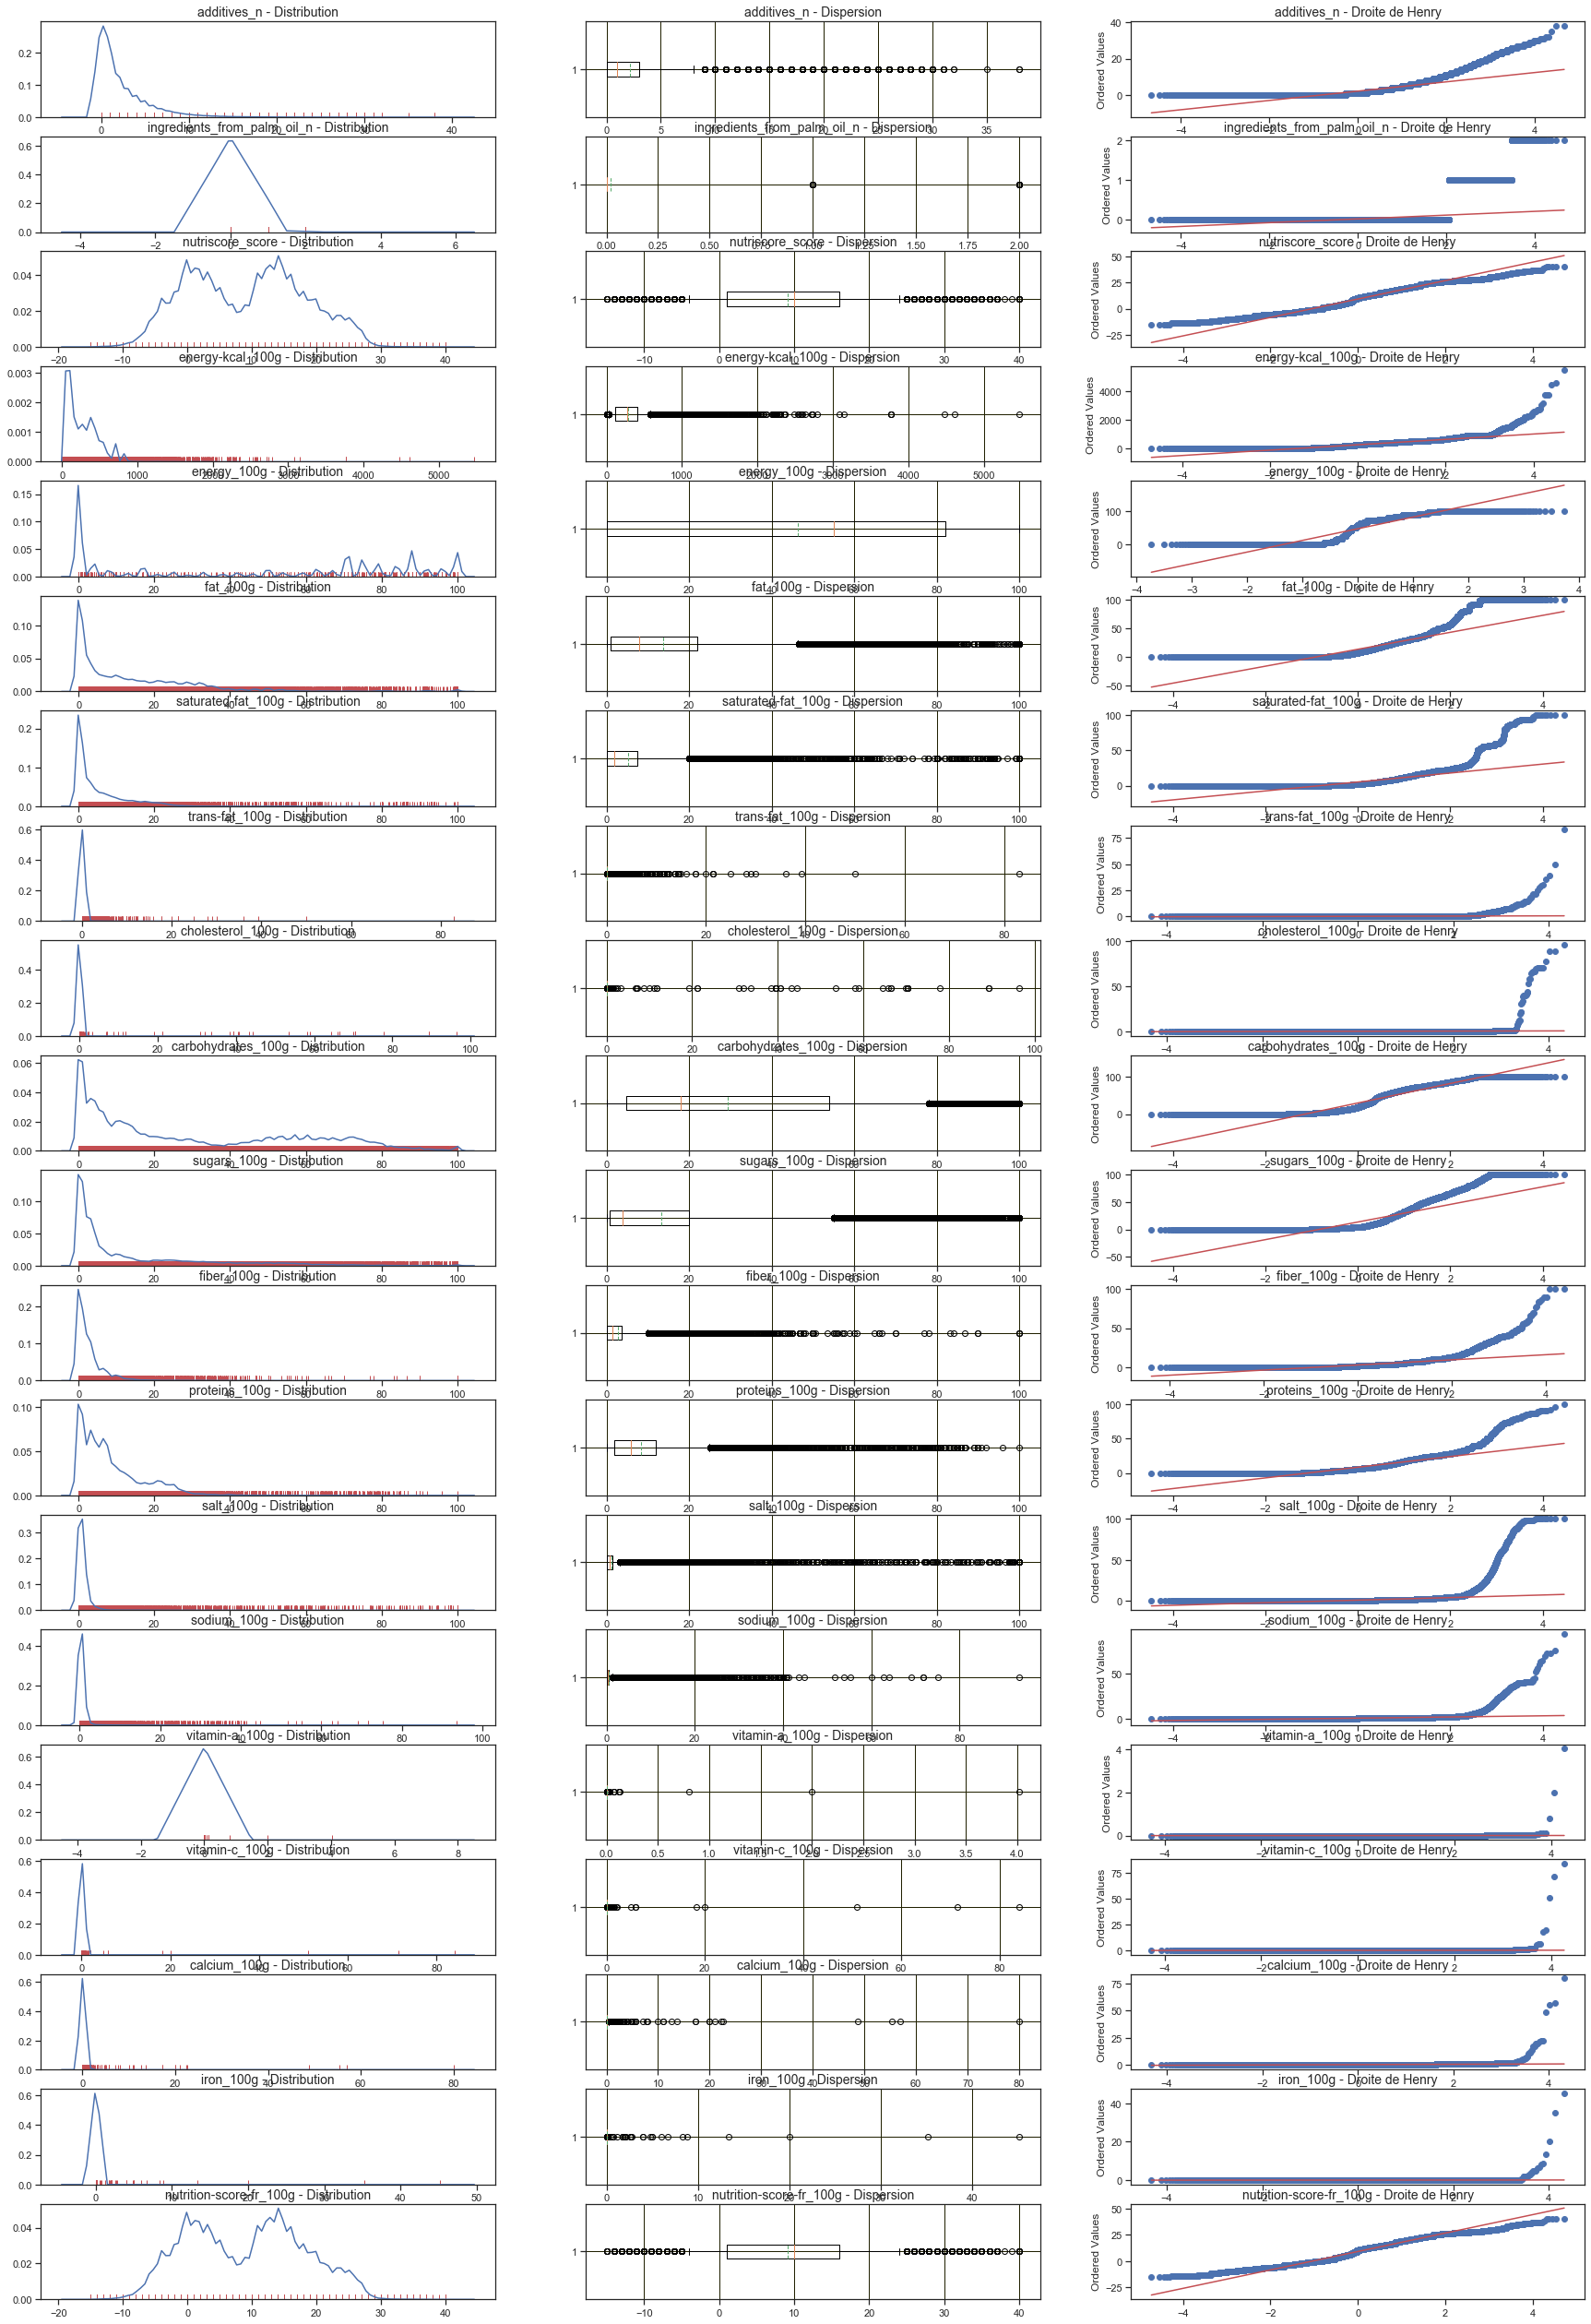

In [58]:
import scipy.stats as stats

nbr_lignes = 22
nbr_colonnes = 3
num_graph = 1

plt.subplots(figsize=(30, 50))

for i in data:
    if i!= 'nutriscore_grade':
        #On code une condition pour ne traiter que les indicateurs désirés
        if num_graph <= nbr_lignes * nbr_colonnes:

            mydata = data[i]
            mydata.dropna(axis=0, inplace=True)

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
           # sns.kdeplot(mydata, cumulative=True, bw=1.5)
            sns.distplot(mydata, hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
            plt.title(i + " - Distribution",size=14)
            plt.xlabel('')

            num_graph +=1

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            plt.boxplot(mydata,whis=[5,95], meanline=True, showmeans=True, vert=False)
            plt.grid()
            plt.title(i + " - Dispersion",size=14)
            num_graph +=1

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)

            measurements = mydata.to_numpy()
            stats.probplot(measurements, dist="norm", plot=plt)
            plt.title(i + " - Droite de Henry",size=14)
            plt.xlabel('')

            num_graph +=1

            if i == "nutrition-score-fr_100g" :
                break

plt.show()


- La plupart des distributions  ont une courbe ressemblant à des distributions Gaussiennes asymétriques à gauche. 
- La droite de Henry permet de vérifier visuellement qu'une distribution est normale. Le principe est simple. Si les points suivent la droite, alors la distribution est Gaussienne. Dans notre cas, nous pouvons constater que les distributions ne sont pas Gaussienne.


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591486 entries, 3 to 1486041
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  450813 non-null  float64
 1   ingredients_from_palm_oil_n  450813 non-null  float64
 2   nutriscore_score             591480 non-null  float64
 3   nutriscore_grade             591480 non-null  object 
 4   energy-kcal_100g             537225 non-null  float64
 5   energy_100g                  7302 non-null    float64
 6   fat_100g                     174512 non-null  float64
 7   saturated-fat_100g           174506 non-null  float64
 8   trans-fat_100g               89091 non-null   float64
 9   cholesterol_100g             90538 non-null   float64
 10  carbohydrates_100g           174454 non-null  float64
 11  sugars_100g                  174506 non-null  float64
 12  fiber_100g                   122305 non-null  float64
 13

### sommer les protéines + glucides + gras => supprimer les produits avec des valeurs supérieures à 100

In [21]:
data['multivariate']=data['proteins_100g']+data['fat_100g']+ data['sugars_100g']
len(data[data.multivariate > 100].index)

104

In [22]:
#data=data.dropna(subset=['multivariate'].values >100) 
data = data.drop(data[data.multivariate > 100].index)
del data['multivariate'] 
data.head()

,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
3,0.0,0.0,18.0,d,NaN,NaN,0.00,0.0,NaN,NaN,...,0.00,0.0,0.00,1.00,0.40,NaN,NaN,NaN,NaN,18.0
13,NaN,NaN,1.0,b,32.0,NaN,1.47,0.0,0.0,0.0,...,5.88,2.9,8.82,1.25,0.50,0.0,0.0,0.0,0.00318,1.0
21,NaN,NaN,14.0,d,381.0,NaN,29.10,17.0,NaN,NaN,...,33.50,1.3,5.50,1.00,0.40,NaN,NaN,NaN,NaN,14.0
31,NaN,NaN,-2.0,a,157.0,NaN,13.80,5.6,NaN,NaN,...,2.90,4.5,11.20,2.70,1.08,NaN,NaN,NaN,NaN,-2.0
35,NaN,NaN,1.0,b,143.0,NaN,23.80,1.8,NaN,NaN,...,25.60,7.7,5.80,0.10,0.04,NaN,NaN,NaN,NaN,1.0


### Matrice de corrélation:
- Cette matrice nous donnera un aperçu de la corrélation linéaire entre nos variables.

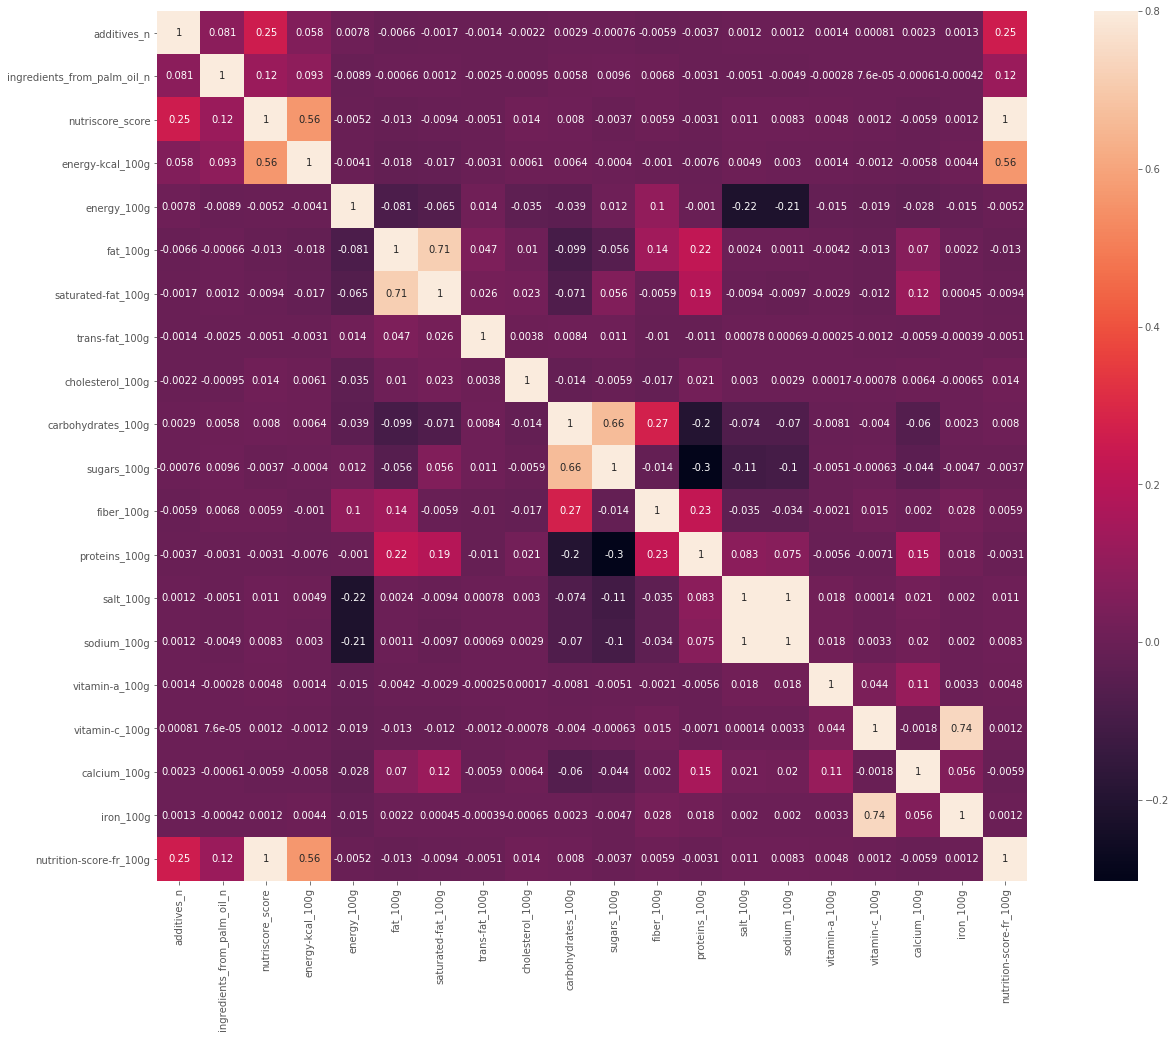

In [54]:
# correlation matrix 
corrmat=data.corr()
f, ax=plt.subplots(figsize=(24, 16))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

- Rappel coefficient linéaire : C'est un coefficient compris entre -1 et 1. Plus la valeur est proche de 1 ou -1, plus la corrélation est vraie et la relation est linéaire. Si la valeur est proche de 0, il n'y a pas de corrélation linéaire entre les deux variables. Un modèle de prédiction linéaire n'est donc pas adapté pour faire de la prédiction.

- Par example,il existe une corrélation entre :
- sugars and carbohydrates 
- salt and sodium 

- il semble que la caractèristique qui affecte principalement le nutrition_score.fr_100g. soint l'energy.kcal_100g , avec le coefficient de pearson de 0.56

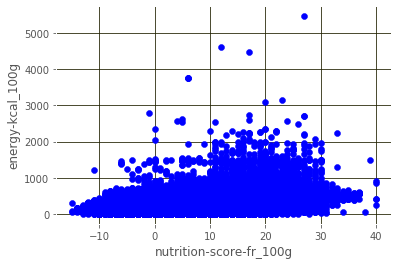

In [57]:
# Let’s visualize this relationship graphically:
plt.scatter(data['nutrition-score-fr_100g'], data['energy-kcal_100g'], color='blue')
plt.xlabel('nutrition-score-fr_100g')  
plt.ylabel('energy-kcal_100g')
plt.show()


# ANOVA:

In [65]:
data['nutriscore_grade']= data['nutriscore_grade'].replace([0.], 'a')
data['nutriscore_grade']= data['nutriscore_grade'].replace([1.], 'b')
data['nutriscore_grade']= data['nutriscore_grade'].replace([2.], 'c')
data['nutriscore_grade']= data['nutriscore_grade'].replace([3.], 'd')
data['nutriscore_grade']= data['nutriscore_grade'].replace([4.], 'e')
data['nutriscore_grade'].unique()

array(['d', 'b', 'a', 'c', 'e', nan], dtype=object)

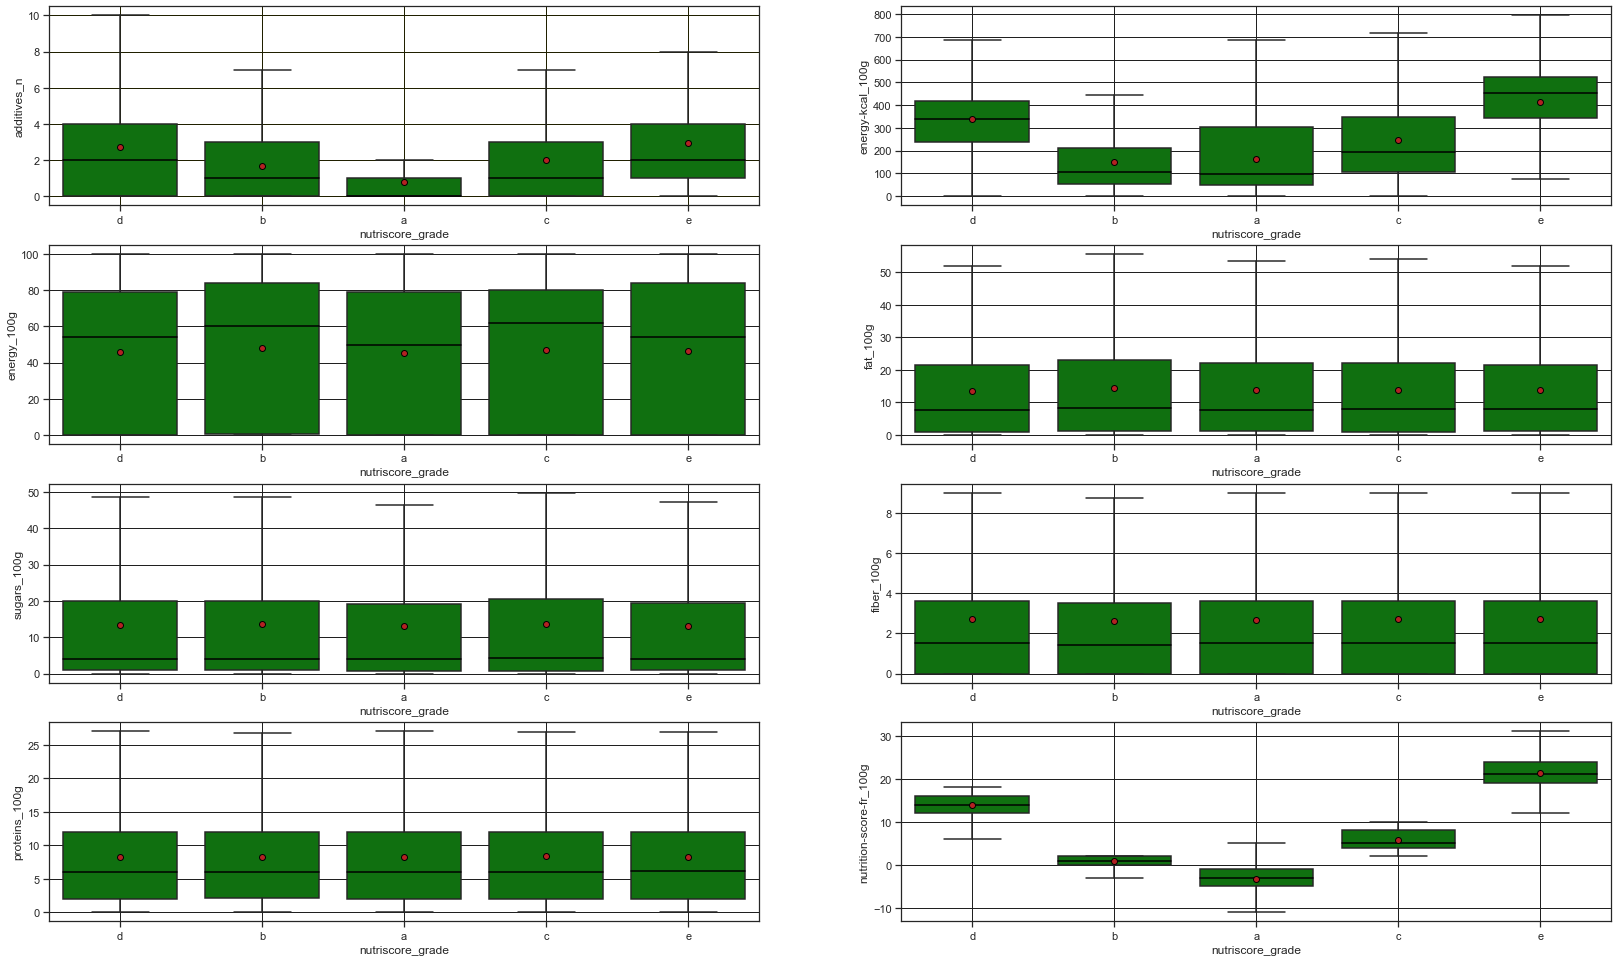

In [66]:
lstt=['additives_n',  'energy-kcal_100g', 'energy_100g', 'fat_100g',
        'sugars_100g', 'fiber_100g', 'proteins_100g','nutrition-score-fr_100g']
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

nbr_lignes = 7
nbr_colonnes = 2
num_graph = 1
plt.subplots(figsize=(28, 30))

for i in lstt:
    
    if num_graph <= nbr_lignes * nbr_colonnes:
        
        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        
        plt.rc('grid', color='#202020') 
        plt.rc('axes', facecolor='white')
        plt.rc('text', color='black')
        
        sns.boxplot(data=data, x="nutriscore_grade", y=i, color="green", showfliers=False, medianprops=medianprops, 
                     showmeans=True, meanprops=meanprops)
        plt.grid()
        
        #plt.title(i,size=10)
        
        num_graph +=1
    if i == "nutrition-score-fr_100g":
        break

plt.show()  

- test de kolmogorov sur energy Kcal après appliqué anova 

# SimpleImputer : 

In [23]:
#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data[columns])
    

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)
imp_data=pd.DataFrame(imputed_data, columns=data.columns)

imp_data.head()

,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0.0,0.0,18.0,3.0,272.0,55.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,1.00,0.40,0.0,0.0,0.036,0.00092,18.0
1,1.0,0.0,1.0,1.0,32.0,55.0,1.47,0.0,0.0,0.0,...,5.88,2.9,8.82,1.25,0.50,0.0,0.0,0.000,0.00318,1.0
2,1.0,0.0,14.0,3.0,381.0,55.0,29.10,17.0,0.0,0.0,...,33.50,1.3,5.50,1.00,0.40,0.0,0.0,0.036,0.00092,14.0
3,1.0,0.0,-2.0,0.0,157.0,55.0,13.80,5.6,0.0,0.0,...,2.90,4.5,11.20,2.70,1.08,0.0,0.0,0.036,0.00092,-2.0
4,1.0,0.0,1.0,1.0,143.0,55.0,23.80,1.8,0.0,0.0,...,25.60,7.7,5.80,0.10,0.04,0.0,0.0,0.036,0.00092,1.0


In [ ]:
# with knn imputer

# prendre 3% de la d
#dataframe1 = data.sample(frac=0.05, replace=True)
#print(dataframe1.shape)
#dataframe1.head()


#X=dataframe1.drop(['nutriscore_grade', 'nutrition-score-fr_100g', 'nutriscore_score' ], axis=1)
#y= dataframe1.nutriscore_grade


# Scale our variable to have values between 0 and 1 
#from sklearn.preprocessing import MinMaxScaler 
#scaler = MinMaxScaler()
#df= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#df.head()


# Splitting the feature array and label array keeping 80% for the training sets 
#x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=5)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 



#from sklearn.impute import KNNImputer
#imputer =KNNImputer(n_neighbors=5)
#X_train=pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
#X_test=pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns)


#X_train.tail()

#X_train.isnull().sum().sort_values(ascending=False).head()
#X_test.isnull().sum().sort_values(ascending=False).head()





# Dimensionality reduction using PCA:
- PCA is a technique that transforms a dataset of many features into principal componenets that "summarize" the variance that underlies the data 
- Each principal component is a calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components
- Use casses for modeling: 
- One of the most common dimensionality reduction techniques 
- Use if there are too many features or if the observation/features ration is poor 
- Also, potentially good option if there are a lot of highly correlated variables in your dataset
- Undortunately, PCA makes models a lot harder to interprest!!!



# PCA transformation 
- PCA (Principal Component Analysis) mainly using to reduce the size of the feature space while retaining as much of the information as possible. In here all the features transformed into 2 features using PCA.

In [68]:
X=imp_data.drop(['nutriscore_grade', 'nutrition-score-fr_100g', 'nutriscore_score' ], axis=1)
y= imp_data.nutriscore_grade


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scale= scaler.fit_transform(X)
data_s= pd.DataFrame(data= data_scale, columns=X.columns )
# Now all the features are standardize into unit scale (mean = 0 and variance = 1)
data_s

,additives_n,ingredients_from_palm_oil_n,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,-0.703820,-0.121081,-0.049762,0.024245,-1.027932,-0.669477,-0.023752,-0.013659,-0.462123,-0.615064,-0.897307,-1.416606,0.100165,0.089991,-0.004656,-0.007614,-0.049755,-0.005371
1,-0.327751,-0.121081,-1.357410,0.024245,-0.871924,-0.669477,-0.023752,-0.013659,1.806673,-0.079982,0.593538,0.454827,0.237749,0.216348,-0.004656,-0.007614,-0.236601,0.021297
2,-0.327751,-0.121081,0.544128,0.024245,2.060391,3.217076,-0.023752,-0.013659,2.336059,2.433448,-0.228997,-0.249613,0.100165,0.089991,-0.004656,-0.007614,-0.049755,-0.005371
3,-0.327751,-0.121081,-0.676344,0.024245,0.436633,0.610799,-0.023752,-0.013659,0.073565,-0.351163,1.416072,0.959816,1.035737,0.949214,-0.004656,-0.007614,-0.049755,-0.005371
4,-0.327751,-0.121081,-0.752623,0.024245,1.497913,-0.257959,-0.023752,-0.013659,2.468405,1.714545,3.061142,-0.185959,-0.395139,-0.364891,-0.004656,-0.007614,-0.049755,-0.005371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591377,-0.327751,-0.121081,0.353429,0.024245,-0.183154,-0.212235,-0.023752,-0.013659,-0.210035,-0.251063,-0.126180,-0.143523,-0.075943,-0.071745,-0.004656,-0.007614,-0.049755,-0.005371
591378,-0.327751,-0.121081,0.380672,0.024245,-0.183154,-0.212235,-0.023752,-0.013659,-0.210035,-0.251063,-0.126180,-0.143523,-0.075943,-0.071745,-0.004656,-0.007614,-0.049755,-0.005371
591379,-0.327751,-0.121081,0.282598,0.024245,-0.183154,-0.212235,-0.023752,-0.013659,-0.210035,-0.251063,-0.126180,-0.143523,-0.075943,-0.071745,-0.004656,-0.007614,-0.049755,-0.005371
591380,0.048319,-0.121081,-0.049762,0.024245,-0.183154,-0.212235,-0.023752,-0.013659,-0.210035,-0.251063,-0.126180,-0.143523,-0.075943,-0.071745,-0.004656,-0.007614,-0.049755,-0.005371


In [71]:
pca= PCA(n_components= 2)
principalComponents= pca.fit_transform(data_s.values)
principalDf=pd.DataFrame(data=principalComponents, columns= ['principal component 1', 'principal component 2'])
finalDf= pd.concat([principalDf, y], axis=1)
finalDf.head()

,principal component 1,principal component 2,nutriscore_grade
0,-1.113246,1.619582,3.0
1,-0.255998,-0.153215,1.0
2,1.775335,-4.037240,3.0
3,1.877357,-0.110618,0.0
4,0.155813,-3.295377,1.0


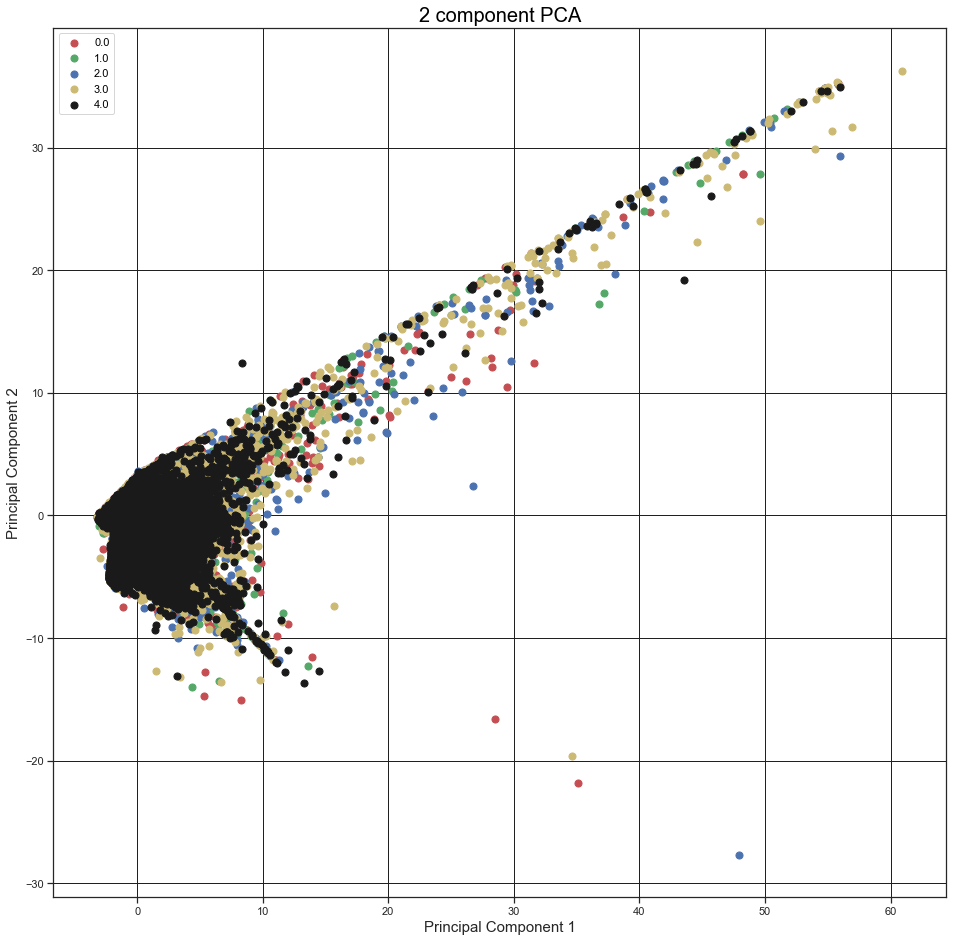

In [72]:
# 2D visualisation 
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0 ,3.0 ,4.0]
colors = ['r', 'g', 'b', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['nutriscore_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [73]:
from sklearn import preprocessing , decomposition , neighbors
# Run PCA
pca = decomposition.PCA()
pca.fit(data_s.values)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[0.11605111 0.11119664 0.09475761 0.07611112 0.06300556 0.06134955
 0.0567393  0.05564648 0.05519985 0.05331669 0.05297498 0.05180993
 0.04950092 0.03550853 0.03510664 0.01456209 0.01262827 0.00453473]
[0.11605111 0.11119664 0.09475761 0.07611112 0.06300556 0.06134955
 0.0567393  0.05564648 0.05519985 0.05331669 0.05297498 0.05180993
 0.04950092 0.03550853 0.03510664 0.01456209 0.01262827 0.00453473]
[0.11605111 0.22724775 0.32200536 0.39811648 0.46112204 0.52247159
 0.57921088 0.63485736 0.69005721 0.74337391 0.79634889 0.84815882
 0.89765974 0.93316827 0.96827491 0.98283701 0.99546527 1.        ]


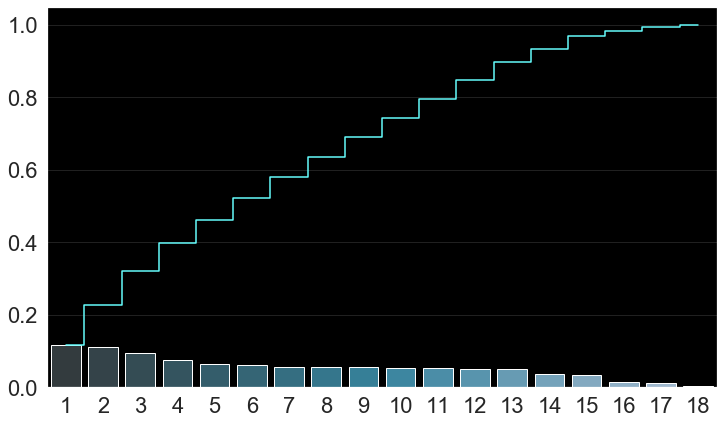

In [74]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=2)
plt.rcParams['axes.facecolor'] = 'black'
plt.rc('grid', color='#202020')

plt.step(range(18), pca.explained_variance_ratio_.cumsum(), where='mid',color="#66FFFF")
sns.barplot(np.arange(1,19),pca.explained_variance_ratio_,palette="PuBuGn_d")

In [76]:
# we have 8 axes 
pca2 = decomposition.PCA(n_components=8)
pca2.fit(data_s.values)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
def PCA_plot (components,comp1,comp2):
    plt.figure(figsize=(12, 12))
    for i, (x, y) in enumerate(zip(components[comp1, :], components[comp2, :])):
        # Display origine segment (x, y)
        plt.plot([0, x], [0, y], color='#00FFFF')
        
        plt.text(x, y, imp_data.columns[i], fontsize='12', color='#FFFF99')
 
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.rcParams['axes.facecolor'] = 'black'
    plt.show()
    

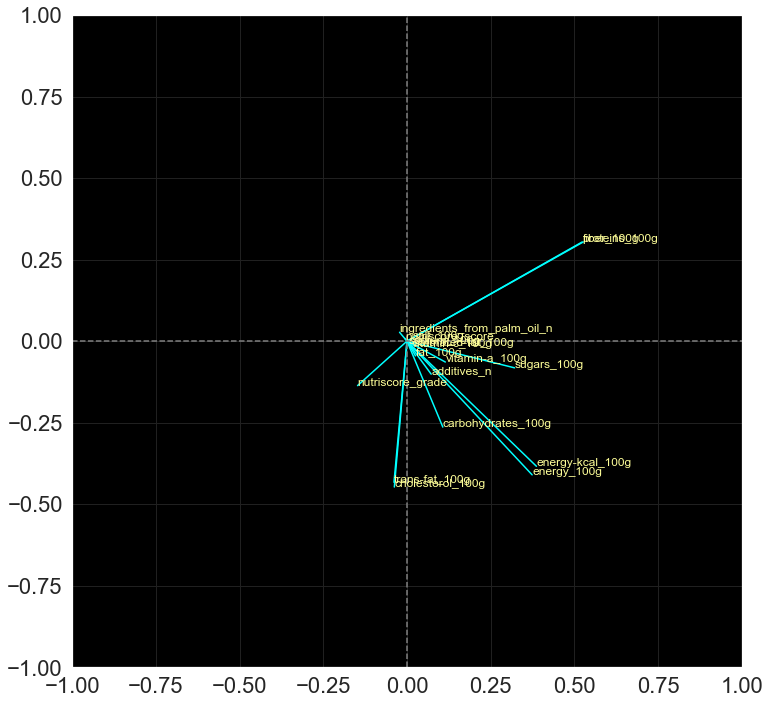

In [78]:
pcs = pca2.components_
PCA_plot(pcs,0,1)
# cercle des corrélations 

# Predict the nutrition-score-fr_100g 
### Split the data 

In [26]:
y= imp_data['nutrition-score-fr_100g']
X=imp_data.drop(['nutriscore_grade', 'nutrition-score-fr_100g', 'nutriscore_score' ], axis=1)


# Splitting the feature array and label array keeping 80% for the training sets 
x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 



# Appliquer le standard Scaler 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scale= scaler.fit_transform(x_train)
# enregistré le scaler !!!
x_train= pd.DataFrame(data= data_scale, columns=x_train.columns )
# Now all the features are standardize into unit scale (mean = 0 and variance = 1)
data_s.head()



(413967, 18) (177415, 18) (413967,) (177415,)


# Feature selection:

In [27]:
# such a large set of features can causes overfitting and also slow computing
#Use feature selection to select the most important features
# choose 5 best features
import sklearn.feature_selection

select=sklearn.feature_selection.SelectKBest(k=7)
selected_features= select.fit(x_train, y_train)
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[X.columns[i] for i in indices_selected]

x_train_selected=x_train[colnames_selected]
x_test_selected=x_test[colnames_selected]

colnames_selected

['additives_n',
 'ingredients_from_palm_oil_n',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g']

# Linear Regression model :

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def linear_reg(x_train, x_test, y_train, y_test):

    lmodellineaire = LinearRegression()
    lmodellineaire.fit(x_train, y_train)
    

    y_train_predict= lmodellineaire.predict(x_train)
    rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2_train=r2_score(y_train, y_train_predict)

    # model evaluation for testing set
    y_test_predict = lmodellineaire.predict(x_test)
    # root mean squared error
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2_test = r2_score(y_test, y_test_predict)

    return rmse_train, rmse_test, r2_train, r2_test, y_test_predict 

   

In [211]:
rmse_train, rmse_test, r2_train, r2_test, y_test_predict =linear_reg(x_train_selected, x_test_selected, y_train, y_test)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_train))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse_train,2),"sur le nutrition-score-fr_100g.")
print('le score R2 est {}'.format(r2_train))
print('\n')

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse_test,2),"sur le nutrition-score-fr_100g.")
print('Lerreur quadratique moyenne est {}'.format(rmse_test))
print('le score R2 est {}'.format(r2_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7.312037826544242
Cela veut dire que pour une prédiction, notre modèle se trompera de 7.31 sur le nutrition-score-fr_100g.
le score R2 est 0.3278228253589204


La performance du modèle sur la base de test
--------------------------------------
Cela veut dire que pour une prédiction, notre modèle se trompera de 7.29 sur le nutrition-score-fr_100g.
Lerreur quadratique moyenne est 7.290280857398949
le score R2 est 0.3295947142836859


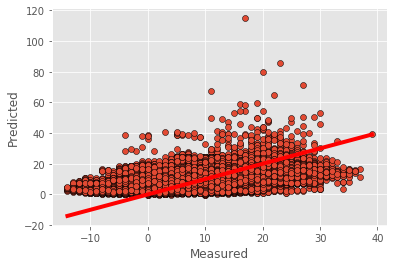

In [212]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## Predict the nutriscore_grade:

In [34]:
# Détermination du nutriscore-grade 
data_pred=imp_data.loc[:, colnames_selected]

data_pred['nutriscore_grade']=imp_data.loc[: , ['nutriscore_grade']]
data_pred.head()

,additives_n,ingredients_from_palm_oil_n,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,nutriscore_grade
0,0.0,0.0,272.0,0.00,0.0,14.0,0.00,3.0
1,1.0,0.0,32.0,1.47,0.0,50.0,5.88,1.0
2,1.0,0.0,381.0,29.10,17.0,58.4,33.50,3.0
3,1.0,0.0,157.0,13.80,5.6,22.5,2.90,0.0
4,1.0,0.0,143.0,23.80,1.8,60.5,25.60,1.0


In [35]:
Y_pred= data_pred['nutriscore_grade']
X_pred=data_pred
X_pred.drop('nutriscore_grade', axis=1, inplace=True)


#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_pred, Y_pred, test_size=0.3, random_state=1)

# Encode the classification labels
#le = LabelEncoder()
#Y_train = to_categorical(le.fit_transform(Y_train)) 
#Y_test = to_categorical(le.fit_transform(Y_test))

## Evaluation du modele de regression lineaire: 
- On utilise deux métriques pour l'évaluation l'erreur quadratique moyenne (l'erreur d'estimation) et le R-square (la qualité du modèle de regression 

In [218]:
rmse_train, rmse_test, r2_train, r2_test, y_test_predict =linear_reg(X_train, X_test, Y_train, Y_test)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_train))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse_train,2),"sur le nutriscore grade.")
print('le score R2 est {}'.format(r2_train))
print('\n')

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse_test,2),"sur le nutriscore grade.")
print('Lerreur quadratique moyenne est {}'.format(rmse_test))
print('le score R2 est {}'.format(r2_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 1.160738309405717
Cela veut dire que pour une prédiction, notre modèle se trompera de 1.16 sur le nutriscore grade.
le score R2 est 0.2455385486776005


La performance du modèle sur la base de test
--------------------------------------
Cela veut dire que pour une prédiction, notre modèle se trompera de 1.16 sur le nutriscore grade.
Lerreur quadratique moyenne est 1.1632657742943227
le score R2 est 0.24684813090775026


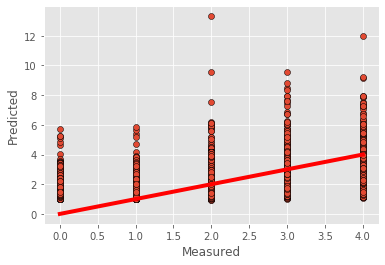

In [220]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(Y_test, y_test_predict, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# K-Nearest Neighbors:
The KNN algorithm is very mature in theory. Its simple, easy-to-understand ideas and good classification accuracy make it widely adopted. The specific process of the algorithm mainly contains the following four steps:


- Data Preparation: Through data cleaning, data processing, each piece of data is organized into vectors.
- Calculate Distance: Calculate the distance between test data and training data.
- Find Neighbors: Find the K training data samples closest to the test data.
- Decision Classification: According to the decision rule, the category of test data is obtained from K neighbors

In [36]:
# predict the 'nutriscore_grade' en all features
y= imp_data['nutriscore_grade']
X=imp_data.drop(['nutriscore_grade', 'nutrition-score-fr_100g', 'nutriscore_score' ], axis=1)


# Splitting the feature array and label array keeping 80% for the training sets 
x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(413967, 18) (177415, 18) (413967,) (177415,)


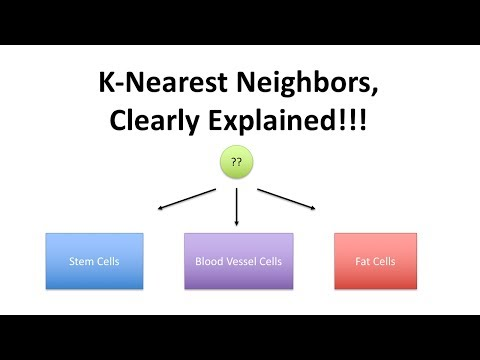

In [92]:
from IPython.display import YouTubeVideo

YouTubeVideo('HVXime0nQeI', width=800, height=300)

In [228]:
# np.ravel()=== it is equivalent to reshape(-1, order=order).
neighbours= np.arange(2, 25)

def knn_classifier(neighbours, x_train, y_train, x_test, y_test):
    train_accuracy =np.empty(len(neighbours))
    test_accuracy = np.empty(len(neighbours))

    for i,k in enumerate(neighbours):
        #Setup a knn classifier with k neighbors
        knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

        #Fit the model
        knn.fit(x_train,y_train.ravel())

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(x_train, y_train.ravel())

        #Compute accuracy on the test set
        test_accuracy[i] = knn.score(x_test, y_test.ravel())

    return test_accuracy, train_accuracy

- We can find the best K value by plotting the accuracy of testing set with the arruracy of trainig set. 
- The best value for k is the point whitch gives the maximum testing accuracy 

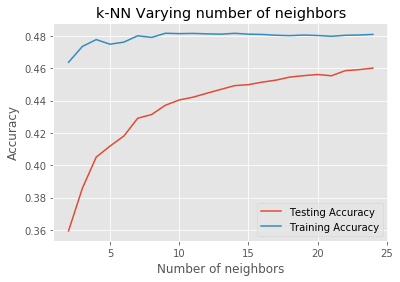

In [229]:
test_accuracy, train_accuracy= knn_classifier(neighbours, x_train, y_train, x_test, y_test)

# Generate plot 
plt.title('k-NN Varying number of neighbors')
plt.plot (neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [230]:
idx=np.where(test_accuracy==max(test_accuracy))
x=neighbours[idx]
print(x)


# I am using sklearn KNeighborsClassifiers to build the model
knn=KNeighborsClassifier(n_neighbors=x[0], algorithm="kd_tree", n_jobs=-1)
knn.fit(x_train, y_train.ravel())



# Save the model to the disk
filename='finalized_model.sav'
joblib.dump(knn, filename)

#Load the model from disk
knn=joblib.load(filename)

#Predicting labels for testing set
knn_predicted_test_labels=knn.predict(x_test)


[24]


# Model Evaluation

In [231]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
#knn_precison_score  = precision_score(y_test,knn_predicted_test_labels, average='micro')
#knn_recall_score    = recall_score(y_test,knn_predicted_test_labels, average='micro')
#knn_f1_score        = f1_score(y_test,knn_predicted_test_labels, average='micro')
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)
print(knn_accuracy_score)
print(knn_MCC  )


0.4600794746780148
0.30034447337867004


# Confusion Matrix
- A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

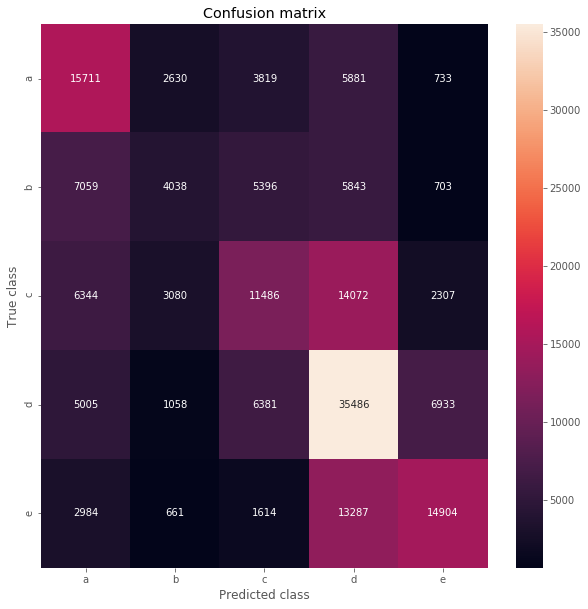

In [233]:
import seaborn as sns
LABELS = ['a', 'b', 'c', 'd', 'e']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# SVM:

In [46]:
# SVM CLASSIFICATION:
from sklearn import metrics
from sklearn import svm    

def SVM_Classification_BeehiveSTATE(X_flat_train, y_train, X_flat_test, y_test, kerneloption='rbf'):

    print('\n')
    print('Starting classification with SVM:')
    Test_Preds=[]
    Train_Preds=[]
    Test_Preds_Proba=[]
    Train_Preds_Proba=[]
    Test_GroundT=[]
    Train_GroundT=[]
   
    print('\n')
    #train :
    CLF = svm.SVC(kernel=kerneloption, probability=True)
    CLF.fit(X_flat_train, y_train)
    y_pred_train = CLF.predict(X_flat_train)
    y_pred_proba_train = CLF.predict_proba(X_flat_train)
    
    Train_GroundT = y_train
    Train_Preds = y_pred_train
    Train_Preds_Proba = y_pred_proba_train[:,1]
    
    # test:
    y_pred_test = CLF.predict(X_flat_test)
    y_pred_proba_test = CLF.predict_proba(X_flat_test)
    Test_GroundT= y_test
    Test_Preds = y_pred_test
    Test_Preds_Proba = y_pred_proba_test[:,1]

    return CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba 

In [ ]:
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(x_train, y_train , x_test, y_test, kerneloption='rbf')



print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))



Starting classification with SVM:




In [ ]:
class_names= ['a', 'b', 'c', 'd','e' ]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=25)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report SVM:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))